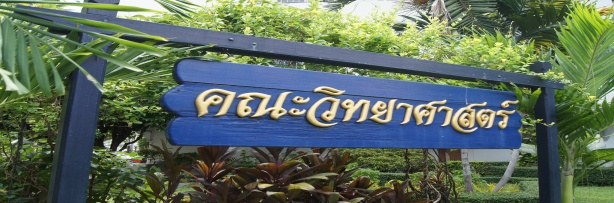

### <span style='color:lightgreen;'>CMYK Color image</span>
**<span style='color:lightgreen;'>CMYK</span>** stands for Cyan, Magenta, Yellow, and Key (black). It's a color model used in color printing. In this model, colors are created by varying the amounts of cyan, magenta, yellow, and black inks applied to a white substrate (such as paper).

**<span style='color:lightgreen;'>RGB</span>** (Red, Green, Blue) is a color model used for electronic displays such as computer monitors, television screens, and digital cameras. In this model, colors are created by mixing various intensities of red, green, and blue light.

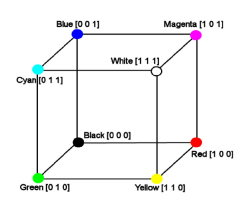           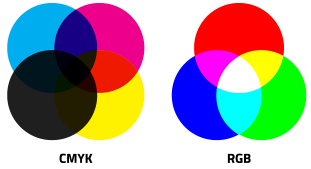

**<span style='color:tomato;'>Converting an RGB image to a CMYK image</span>**  involves transforming the colors from one color space to another. However, it's important to note that RGB and CMYK are fundamentally different color models, and not all colors in an RGB image can be accurately reproduced in CMYK. This is because RGB encompasses a wider range of colors than CMYK.

The transformation from RGB to CMYK typically involves the following steps:

#### <span style='color:tomato;'>Import Libraly and Define Nessessary Modules</span>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ShowImage(img, gray):
    plt.axis("off")
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

#### <span style='color:tomato;'>Read RGB Color image</span>

In [3]:
img = cv2.imread('./images/bank.png')
B,G,R = cv2.split(img) 

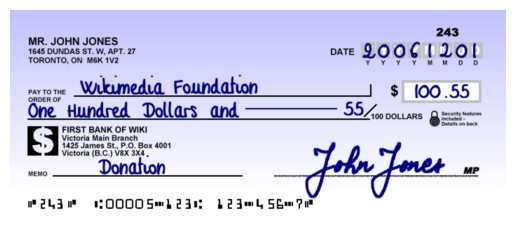

In [4]:
ShowImage(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), False)

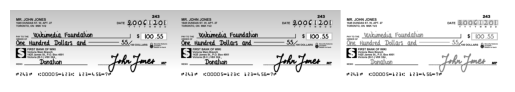

In [5]:
imgs = cv2.hconcat([R, G, B])
ShowImage(imgs, True)

**<span style='color:tomato;'>Color Space Conversion:</span>** Convert the RGB values to CMY values using the following formulas:
- **<span style='color:orange;'>C = 1 - R</span>**
- **<span style='color:orange;'>M = 1 - G</span>**
- **<span style='color:orange;'>Y = 1 - B</span>**
- **<span style='color:orange;'>K = MIN(C,M,Y) </span>**

where R, G, and B are the normalized (0 to 1) values of the red, green, and blue components respectively, and C, M, and Y are the resulting cyan, magenta, and yellow components.

In [6]:
rgb_scale = 255
R = img[:, :, 2].astype(np.float16)/rgb_scale
G = img[:, :, 1].astype(np.float16)/rgb_scale
B = img[:, :, 0].astype(np.float16)/rgb_scale

C = 1 - R
M = 1 - G
Y = 1 - B


**<span style='color:tomato;'>Black Generation:</span>** Calculate the black component (K) based on the CMY values. The black component is often added to improve the depth and contrast of the printed image, as well as to conserve the CMY inks. One common method for calculating K is to set it equal to the minimum of C, M, and Y:

In [7]:
K = np.minimum.reduce([C, M, Y])

Alternatively, other black generation methods might involve using color profiles or applying specific algorithms to determine the K value.

**<span style='color:tomato;'>Total Ink Limit:</span>** Adjust the CMYK values to ensure that the total ink coverage (sum of C, M, Y, and K) does not exceed the printing capabilities of the output device or the substrate. This is necessary to prevent issues such as ink bleeding or paper saturation.

**<span style='color:tomato;'>Gamut Mapping:</span>** If any of the CMYK values fall outside the printable gamut (range of reproducible colors) of the printing device, they may need to be adjusted or mapped to the closest printable color within the gamut.

In [8]:
cmyk_scale = 255
C = (C-K)*cmyk_scale
M = (M-K)*cmyk_scale
Y = (Y-K)*cmyk_scale
K = K*cmyk_scale

In [9]:
C, M, Y, K = C.astype(np.uint8), M.astype(np.uint8), Y.astype(np.uint8), K.astype(np.uint8)

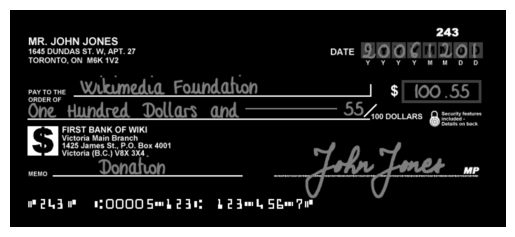

In [14]:
imgs = cv2.hconcat([C, M, Y, K])
ShowImage(K, True)

#### <span style='color:tomato;'>RGB2CMYK and CMYK2RGB functions</span>

In [14]:
def rgb2cmyk(img, rgb_scale, cmyk_scale):
    R = img[:, :, 2].astype(np.float16)/rgb_scale
    G = img[:, :, 1].astype(np.float16)/rgb_scale
    B = img[:, :, 0].astype(np.float16)/rgb_scale
    
    C, M, Y = 1 - R, 1 - G, 1 - B
    K = np.minimum.reduce([C, M, Y])
    
    C = (C-K)*cmyk_scale
    M = (M-K)*cmyk_scale
    Y = (Y-K)*cmyk_scale
    K = K*cmyk_scale
    return C.astype(np.uint8),M.astype(np.uint8),Y.astype(np.uint8),K.astype(np.uint8)

In [15]:
def cmyk2rgb(C,M,Y,K,rgb_scale,cmyk_scale):
    C = C.astype(np.float16)
    M = M.astype(np.float16)    
    Y = Y.astype(np.float16)
    K = K.astype(np.float16)
    R = rgb_scale*(1.0-((C+K)/cmyk_scale))
    G = rgb_scale*(1.0-((M+K)/cmyk_scale))
    B = rgb_scale*(1.0-((Y+K)/cmyk_scale))
    return R.astype(np.uint8),G.astype(np.uint8),B.astype(np.uint8)

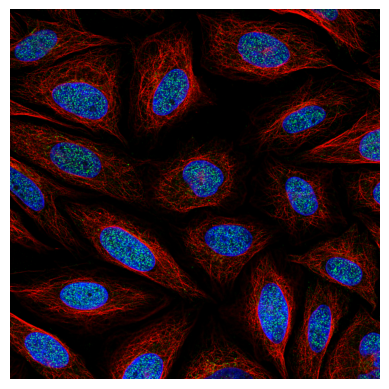

In [16]:
#img = cv2.imread('./images/ycmk2.png')
img = cv2.imread('./images/test.tif')
ShowImage(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), False)

In [17]:
c, m, y, k = rgb2cmyk(img, 255.0, 255.0)

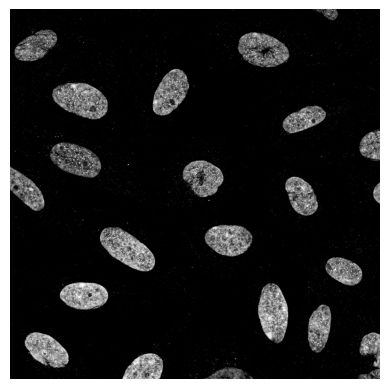

In [18]:
ShowImage(c, True)